In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [4]:
np.random.seed(42)
data = pd.read_csv('BostonHousing.csv', header=(0))
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [10]:
col=data.shape[1]
x=data[:,0:col-1]
y=data[:,-1]


In [14]:
p = 0.2 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = p, random_state = 42)

In [16]:
from sklearn.linear_model import LinearRegression

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

In [19]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.6687594935356279


## questao 5

Considere os dados gerados com o código abaixo. Calcule as medidas Accuracy e Recall usando uma árvore de decisão com o critério Gini.

Use: model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 42)

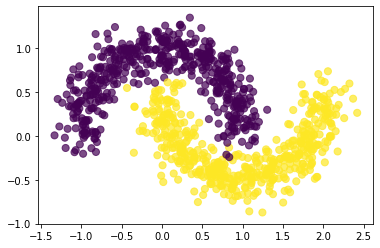

In [20]:
from sklearn import datasets
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

 
plt.figure(figsize=(6,4))
n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=.15, random_state=42)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

 
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 2)

In [21]:
from sklearn import tree
# Cria o modelo usando o criterio Gini
model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 42)
# Ajusta o modelo usando os dados de treinamento
model.fit(x_train,y_train)
# realizar a predição
y_pred = model.predict(x_test) 

In [22]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.985


In [24]:
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_pred, y_test))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))
print('\n clasification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.985
F1 score: 0.9849544873241556
Precision: 0.9852468887996788
Recall: 0.9847117794486215

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.98      0.99      0.99       105

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200

